Importing Libraries 


In [28]:
#Importing all the important libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Data Preprocessing
 

In [4]:
#Loading the dataset 
df = pd.read_csv("SalesAdvertising_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Handling missing values 

In [7]:
#Finding null values 
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Exploratory Data Analysis 

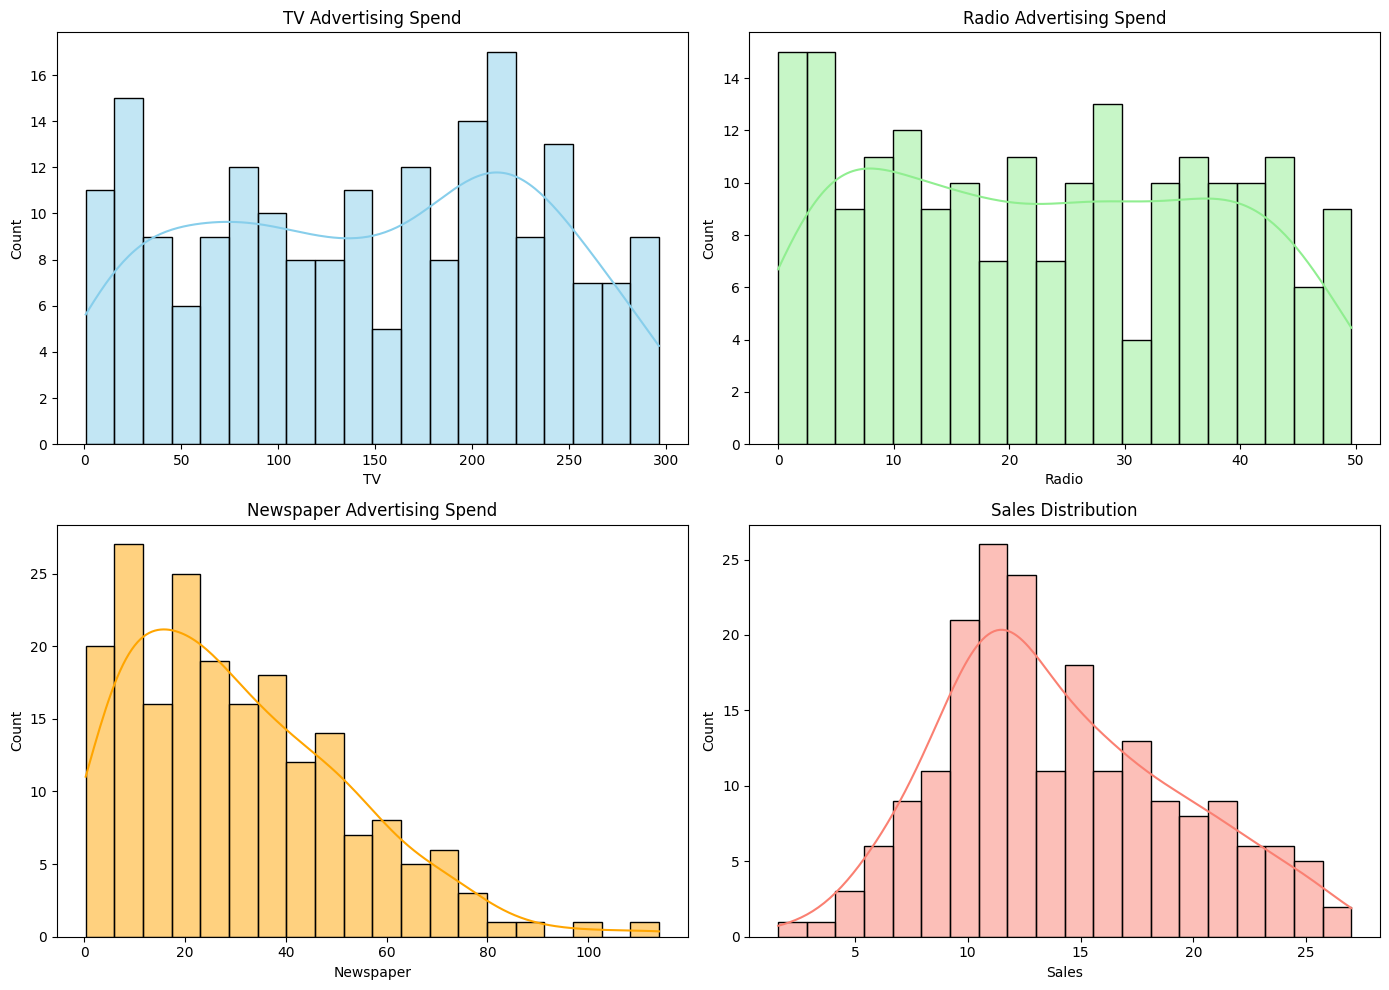

In [8]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograms
sns.histplot(df['TV'], bins=20, kde=True, ax=axs[0,0], color="skyblue")
axs[0,0].set_title("TV Advertising Spend")

sns.histplot(df['Radio'], bins=20, kde=True, ax=axs[0,1], color="lightgreen")
axs[0,1].set_title("Radio Advertising Spend")

sns.histplot(df['Newspaper'], bins=20, kde=True, ax=axs[1,0], color="orange")
axs[1,0].set_title("Newspaper Advertising Spend")

sns.histplot(df['Sales'], bins=20, kde=True, ax=axs[1,1], color="salmon")
axs[1,1].set_title("Sales Distribution")

plt.tight_layout()
plt.show()

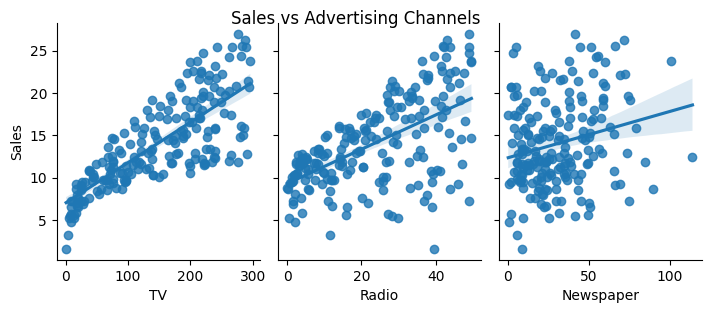

In [26]:
# Scatter plots with regression lines
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=3, aspect=0.8, kind='reg')
plt.suptitle("Sales vs Advertising Channels", fontsize=12, y=1.01)
plt.show()


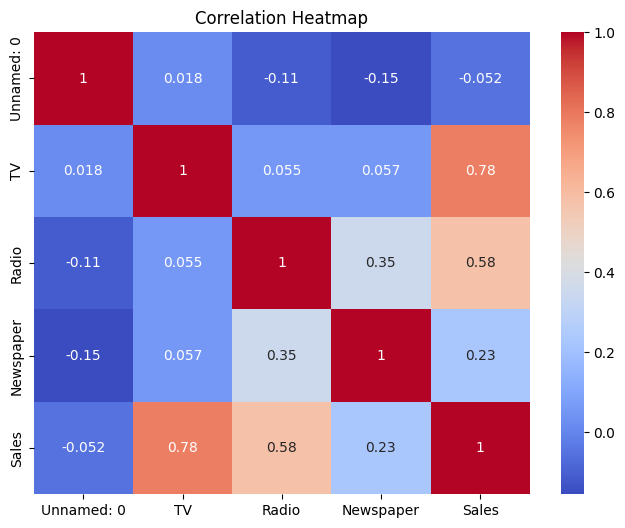

In [20]:
#Correlation heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Feature Selection 


In [27]:
X = df.drop('Sales', axis=1)  #Features 
y = df['Sales']               #Target

Data Splitting 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)

Model Training 

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model Prediction 

In [41]:
y_pred = model.predict(X_test)

Model Evaluation 

In [42]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2.3363180379072293
R² Score: 0.9078086915924752


Data Visualization 

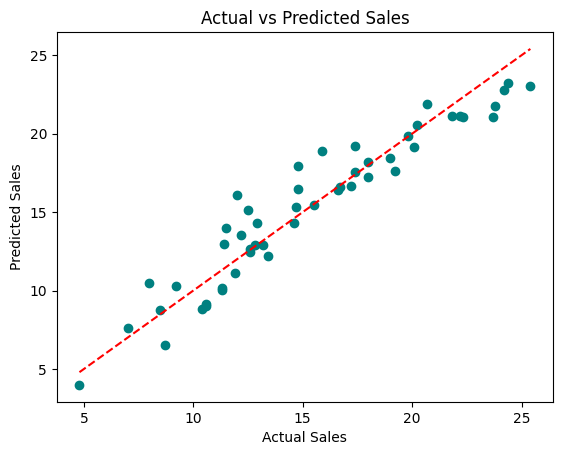

In [44]:
plt.scatter(y_test, y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()